# Python for Data Science Teaching Session 2: Data Visualisation

## Introduction

### Session Objectives

- Creating scatter and line plots
- Subplots and layouts
- Barplots and histograms
- Plot aesthetics and saving

## Getting Started with Matplotlib

### What is Matplotlib?

Matplotlib is a Python library for creating high-quality visualisations with minimal effort. There are a few important points to note:
- Alongside Pandas, Matplotlib is also part of the SciPy stack
- It is not only used for static plots but also animations and interactive plots
- It is the foundation for many other Python libraries such as Seaborn, plotnine, and HoloViews

There are two main ways of using Matplotlib, known as the two interfaces. 

|           Pyplot Interface          | Object-Oriented Interface |
|:-----------------------------------:|:-------------------------:|
|          Inspired by MATLAB         |     Inspired by Python    |
|          Less code requires         |  Requires some setup code |
|             More limited            |    Completely flexible    |
| Largely incompatible with animation |    Allows for animation   |

Many introductory tutorials focus on the former or change between the two without making a clear distinction. Instead, we will solely use the object-oriented interface in this session, as it is the most versatile in the long-run. Confusingly, the object-oriented interface still uses the `pyplot` submodule to initialise plots, but after this, we use a purely object-oriented style.

We can start by importing the `pyplot` submodule as `plt` alongside Pandas. For this session, we will use a dataset related to traffic volume, which can be downloaded from this session's [resources](https://education.wdss.io/python-for-data-science/session-two). You can learn more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). All preprocessing code is implemented for you since that is not the focus of this session, but it is worthwhile having a look through to understand what the code is doing.

In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the metro dataset
metro = pd.read_csv('/Users/aadhisamarasekara/Desktop/WDSS python for data science/Datasets/Metro_Interstate_Traffic_Volume.csv',
                    parse_dates=['date_time'])

# Replace specific holidays with Boolean value for presence of any holiday
metro['day'] = metro['date_time'].dt.floor('d')
holiday = metro['holiday'].ne('None').groupby(metro['day']).sum() > 0
metro.drop('holiday', axis=1, inplace=True)
metro = metro.merge(holiday, left_on='day', right_index=True)
metro.drop('day', axis=1, inplace=True)

# Remove corrupt data points
metro = metro[(metro['rain_1h'] < 20) & (metro['temp'] > 200)]

# Take subset to reduce overplotting
metro_one_week = metro[
    (metro['date_time'] > '2016-06-01 00:00:00') &
    (metro['date_time'] < '2016-06-08 00:00:00')
].reset_index(drop=True)

In [3]:
# View the metro dataset
metro_one_week.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday
0,289.48,0.0,0.0,20,Clouds,few clouds,2016-06-01 01:00:00,441,False
1,289.42,0.0,0.0,20,Clouds,few clouds,2016-06-01 02:00:00,321,False
2,289.01,0.0,0.0,1,Clear,sky is clear,2016-06-01 03:00:00,337,False
3,288.47,0.0,0.0,1,Clear,sky is clear,2016-06-01 04:00:00,917,False
4,287.49,0.0,0.0,20,Clouds,few clouds,2016-06-01 05:00:00,3160,False


One final point to mention before we kick off, is an alternative method for extracting a column (as a series) from a Pandas dataframe. This method only works when the column name has no spaces.

In [4]:
metro_one_week.temp

0      289.48
1      289.42
2      289.01
3      288.47
4      287.49
        ...  
179    293.97
180    293.08
181    290.80
182    288.13
183    286.80
Name: temp, Length: 184, dtype: float64

### What Makes a Plot?

Before we get started, it is helpful to introduce the terminology to describe the components of a plot. In fact, what we would refer to colloquially as a 'plot' is actually called a figure in Matplotlib terminology (the plot is only the data itself, represented as a line, points, etc.).

![The Anatomy of a Figure](images/plot_anatomy.webp)

The key components we care about are:

- **Figure**: The canvas on which you create your visualisation, and the object that keeps track of your axes.
- **Axes**: A region of a figure used representing a data space. Multiple axes can belong to one figure.
- **Axis**: A single dimension of a set of axes that controls data limits. Each axes has 2 or 3 axis objects.
- **Plot**: The representation of data in the plot (e.g. points, lines, bars, etc.)

Using the object-oriented interface, we first create a figure, add a set of axes, and then add a plot. For example, we could create a scatter plot of pH against citric acid levels.

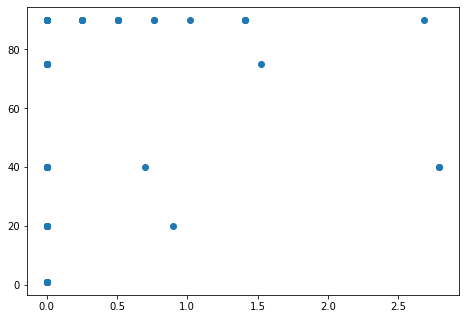

In [5]:
# Scatter plot of clouds coverage against rainfall
metro_one_week.columns

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
plt.show()

> Note, we'll learn how to add axis labels, figure titles, and legends later

Let's break down the lines one at a time:

1. Create a new figure `fig`
2. Add a set of axes to the figure, positioned using `[x, y, w, h]` where the lower-left corner is at `(x, y)` and the width and height are `w` and `h` respectively
3. Add a scatter plot to `ax`, using `metro.rain_1h` for the x-axis and `metro.clouds_all` for y
4. Display the plot

> As a matter of fact, we don't need `plt.show()` when we're creating a plot in the global scope (as opposed to in a loop or function). If we don't include  it, however, we get a text print-out above our plot corresponding to the last Matplotlib command we ran. We can avoid this by ending the final line with a semi-colon, but adding `plt.show()` arguably produces cleaner code.

We can use this same approach to add multiple axes which can themselves contain multiple plots. Also, just as we use the `scatter` method of an axes object to create a scatter plot, we can use the `plot` method to create a line plot. 

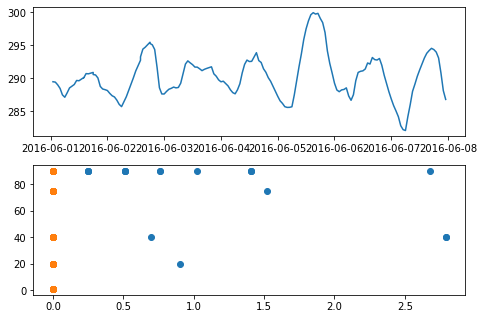

In [6]:
# Scatter plot of clouds against rain/snow
# and line plot of temperature over time
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 0.45])
ax2 = fig.add_axes([0, 0.55, 1, 0.45])

ax1.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
ax1.scatter(metro_one_week.snow_1h, metro_one_week.clouds_all)
ax2.plot(metro_one_week.date_time, metro_one_week.temp)
plt.show()

> Matplotlib also offers a shorthand notation for creating plots directly from a Pandas dataframe. Read about it [here](https://matplotlib.org/3.3.1/gallery/misc/keyword_plotting.html).

### Subplots

Hopefully, you can already see the incredible freedom that the object-oriented interface provides you with. That said, it is a bit of a hassle to manually figure out what position each axes object should have. When we are after a grid-based layout, there is an easier approach using `plt.subplots`, in which the figure and axes are created at the same time. This works for a single set of axes...

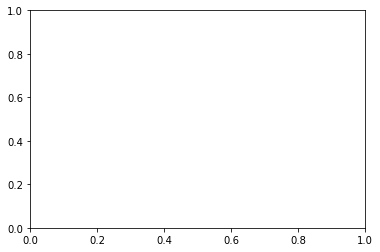

In [7]:
# Single subplot
fig, ax = plt.subplots() #shorter way of creating  axis??

...or a row/column...

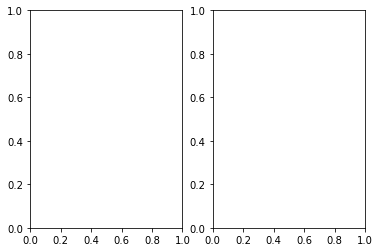

In [8]:
# Row of two subplots
fig, axs = plt.subplots(1, 2)

...or a full grid.

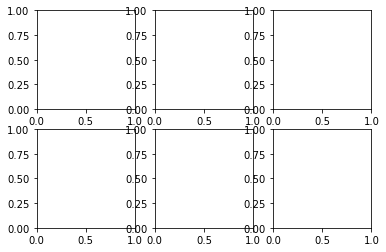

In [9]:
# 2x3 grid of subplots
fig, axs = plt.subplots(2, 3)

In the middle case, `axs` is a list of axes, and in the latter, it is a list of lists of axes.

In [10]:
# View `axs`
axs

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

We can then add a plot to one of these axes objects by using its index in the list.

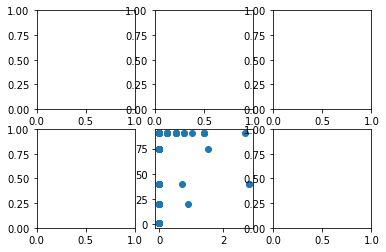

In [11]:
# Clouds vs rain on axes in row 2, column 2
fig, axs = plt.subplots(2, 3)
axs[1][1].scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
plt.show()

> For non-grid layouts, you can use a `GridSpec` object, documented [here](https://matplotlib.org/2.0.2/users/gridspec.html#gridspec-and-subplotspec).

## Going Beyond

### Colour, Size, and Transparency

There are many ways in which plots can be further modified. The best place to find out about these is the respective documentation for each plot type. Matplotlib is notorious for being inconsistent and arbitrary in the plot properties that are available and the names used to access them, so don't assume that what works for one plot type will work for another too. Most properties can either be set to a single value or mapped to an array/series the same length as the data.

We will introduce a few key properties for scatter plots. We start with colour.

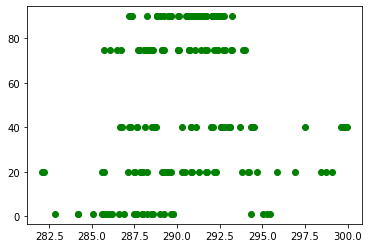

In [12]:
# Green scatter plot of clouds vs temperature
fig, ax = plt.subplots()
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all, c='green')
plt.show()

> You can view a list of named colours [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html). You are also free to use hex codes if you are familiar with those.

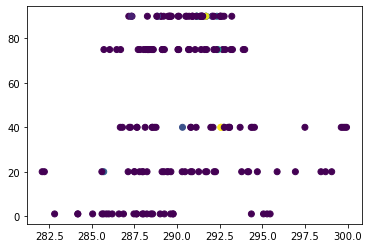

In [13]:
# Same as above but coloured by rainfall
fig, ax = plt.subplots()
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all, c=metro_one_week.rain_1h)
plt.show()

You may have noticed that there was considerable overplotting in our rain-cloud plot before. We can resolve this by counting how many points are overlapping and using this as the size of our points. Note, Matplotlib is more consistent with columns than indexes so when grouping, we often want to use `as_index=False`.

In [14]:
# Count how many values share each rainfall/cloud coverage pair
rain_cloud = metro_one_week.groupby(['rain_1h', 'clouds_all'], as_index=False).size()  #look at effect of as_index
rain_cloud.head()

,rain_1h,clouds_all,size
0,0.0,1,28
1,0.0,20,33
2,0.0,40,30
3,0.0,75,38
4,0.0,90,35


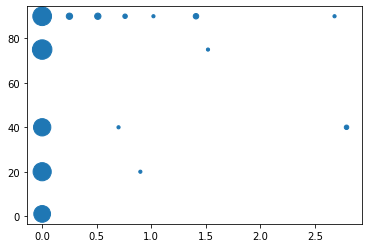

In [15]:
# Plot cloud coverage vs rainfall as a count plot
fig, ax = plt.subplots()
ax.scatter(rain_cloud.rain_1h, rain_cloud.clouds_all, s=rain_cloud['size'] * 10)
plt.show()

An alternative way of handling overplotting is to make the points transparent. This can be achieved using the `alpha` property. Here, 0 corresponds to pure transparency and 1 is completely opaque.

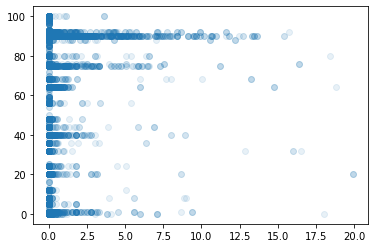

In [16]:
# Plot all data points with transparency
fig, ax = plt.subplots()
ax.scatter(metro.rain_1h, metro.clouds_all, alpha=0.1)
plt.show()

Line plots have unique properties such as line style (`ls`) and line width (`lw`). See the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) for the values that `ls` can take.

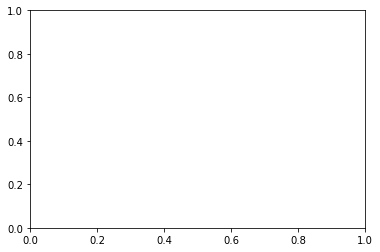

In [17]:
fig, ax = plt.subplots()
# ...
plt.show()

> Unlike in other languages (e.g. R), Matplotlib does not allow you to change the colour, width, or transparency of a line plot differently throughout the line. Instead, you are forced to break the line up into individual segments which each have fixed properties. Read more about this [here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/multicolored_line.html).

### Text and Gridlines

So far our plots have been extremely unreadable. Let's remedy that by adding axis labels and a title.

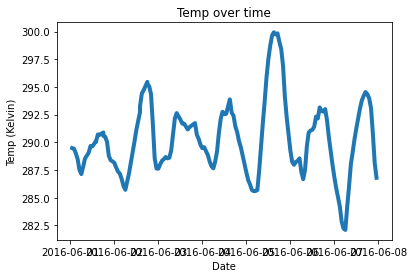

In [18]:
# Create a labelled plot of temperature over time
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp, ls = '-', lw = 4)
ax.set_xlabel('Date')
ax.set_ylabel('Temp (Kelvin)')
ax.set_title('Temp over time')
plt.show()

> When using the pyplot interface, almost all methods for setting text, ticks, and gridlines are different. The usual change is the introduction of `set_` at the start of the method name, but there are exceptions to this rule. The important takeaway is to make sure the method documentation you're looking at belongs to `Axes` and not `pyplot`.

We can also rotate the axis labels and font size.

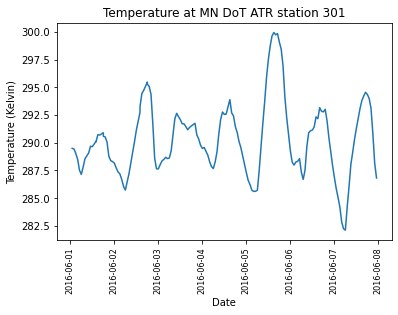

In [19]:
# Rotate the x-axis labels by 90 degrees and shrink to size 8
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_title('Temperature at MN DoT ATR station 301')
plt.show()

In a similar way, we can set axis limits.

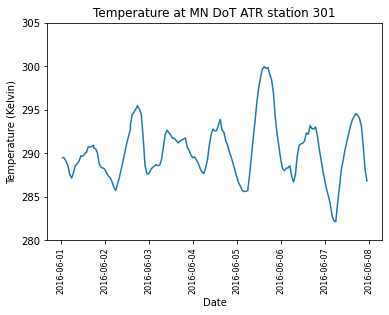

In [20]:
# Expand the y-axis range to (280, 305)
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(280, 305)
ax.set_title('Temperature at MN DoT ATR station 301')
plt.show()

Finally, we can add grid lines. By default, these appear in front of the plots, so we have to overwrite this behaviour with `zorder=0`

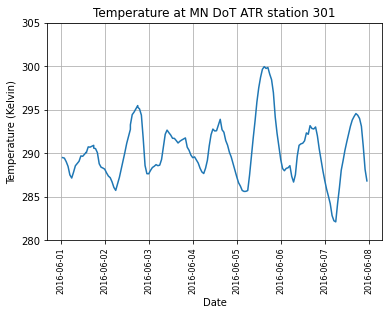

In [21]:
# Add major gridlines in the background
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(280, 305)
ax.set_title('Temperature at MN DoT ATR station 301')
ax.grid(zorder=0)
plt.show()

If you would like minor grid lines too, this has to be turned on before you can modify its properties.

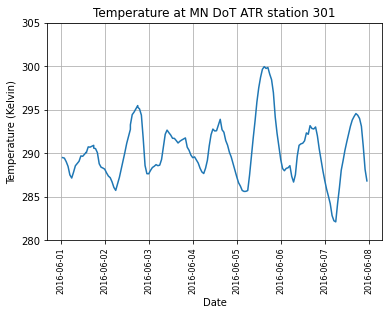

In [22]:
# Add minor gridlines in the background with moderate transparency
fig, ax = plt.subplots()
ax.plot(metro_one_week.date_time, metro_one_week.temp)
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_ylabel('Temperature (Kelvin)')
ax.set_ylim(280, 305)
ax.set_title('Temperature at MN DoT ATR station 301')
ax.grid(zorder=0)
# ...
plt.show()

### Further Plot Types

We will now quickly run through some common plot types. In fact, the types of plots that Matplotlib can easily create is limited, and so many people prefer to use [Seaborn](https://seaborn.pydata.org/) to create plots before using Matplotlib to refine them.

We start with the histogram. A few important parameters are:
- `bins`: number of or locations of bins (default: 10)
- `density`: if `True`, plot density rather than counts
- `edgecolor`/`color`: self-explanatory

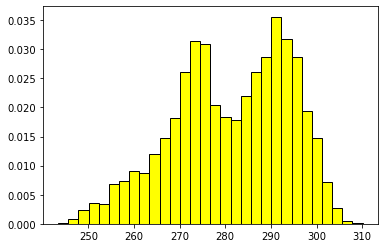

In [23]:
# Create a histogram of temperature
fig, ax = plt.subplots()
ax.hist(metro.temp, bins=30, density=True, color='yellow', edgecolor='black')
plt.show()

We can also create bar charts. When our x-axis is numeric, Matplotlib isn't sure where the axis ticks should be and what the corresponding labels are, so we often have to set these manually.

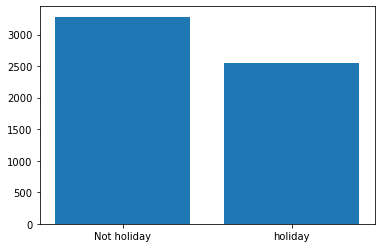

In [24]:
# Create a bar chart of average traffic on holidays and regular days
avg_traffic = metro.groupby('holiday', as_index=False)['traffic_volume'].mean()
fig, ax = plt.subplots()
ax.bar(avg_traffic['holiday'], avg_traffic['traffic_volume'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not holiday', 'holiday'])
plt.show()

> We can also create stacked bar charts, but unfortunately the approach is not the most intuitive so we'll skip it here. You can read the relevant help guide [here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html) however.

## The Final Touches

### Graphical Properties

Now that we know how to create some basic plots, we may want to export these for use in presentations and write-ups. Before we do this, we need to learn how to improve the quality of our plots.

The most common way to improve the aesthetics of our visualisations is to increase the figure size. This makes are plot less cramped, especially when we have multiple subplots. This can be controlled using `figsize` parameter of `plt.figure` or `plt.subplots`.

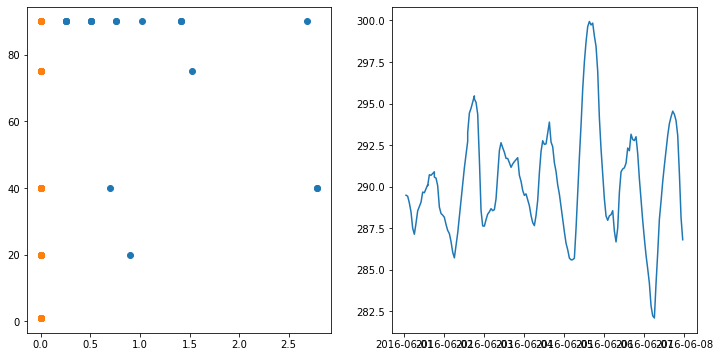

In [25]:
# Set the plot to be 12x6 inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # <- modify this
ax1.scatter(metro_one_week.rain_1h, metro_one_week.clouds_all)
ax1.scatter(metro_one_week.snow_1h, metro_one_week.clouds_all)
ax2.plot(metro_one_week.date_time, metro_one_week.temp)
plt.show()

We can also control the resolution of our graphics using the `dpi` parameter. To emphasise the effect that this has, we can set it to a ridiculously low value.

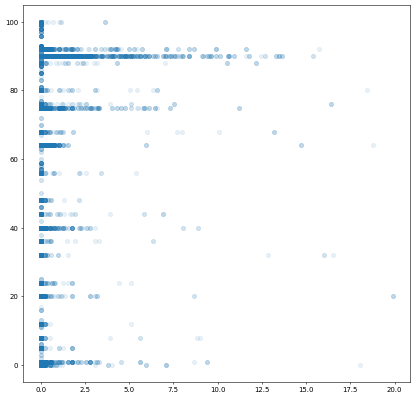

In [26]:
# Create a 5x5 inch plot at 20dpi
fig, ax = plt.subplots(figsize=(10 ,10), dpi=50)  # <- modify this
ax.scatter(metro.rain_1h, metro.clouds_all, alpha=0.1)
plt.show()

Finally, Matplotlib defaults to creating graphics with transparent backgrounds. We can change this using `set_facecolor`. Note that this is a method of the figure, not one particular axes object.

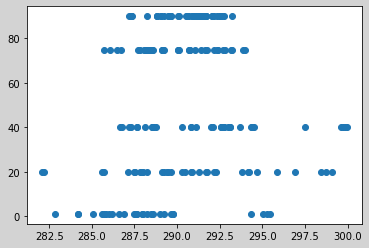

In [28]:
# Set the figure background to a light grey
fig, ax = plt.subplots()
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all)
fig.set_facecolor('lightgray')  
plt.show()

### Legends and Colourbars

The final requirement for making our plots readable is the introduction of legends and colourbars. To add a legend, we must provide labels for each of our plots and then add the legend at the end. 

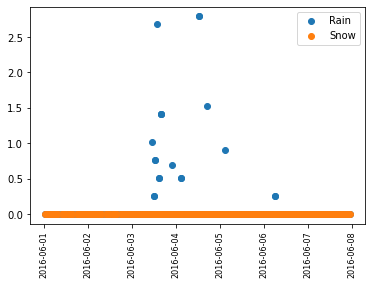

In [29]:
# Plot of rainfall and snowfall over time
fig, ax = plt.subplots()
ax.scatter(metro_one_week.date_time, metro_one_week.rain_1h, label='Rain')  # <- modify this
ax.scatter(metro_one_week.date_time, metro_one_week.snow_1h, label='Snow')  # <- modify this
ax.legend()
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
plt.show()

A few useful optional parameters are:
- `loc`: location of legend ("best", "upper right", "center right", "lower center", etc.)
- `ncol`: number of columns 
- `title`: legend title

> Custom legends can be created using `ax.legend` too. Read the documentation to learn how.

When mapping a continuous variable to the colour of a scatter plot, we can also add a colour bar. The approach for doing this is somewhat unusual. For one, the colour bar belongs to the figure rather than any set of axes, and it requires a reference to the scatter plot to be passed as an argument.

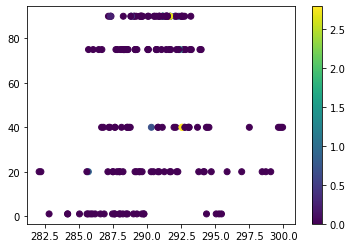

In [30]:
# Same as above but coloured by rainfall with colour bar
fig, ax = plt.subplots()
sc = ax.scatter(metro_one_week.temp, metro_one_week.clouds_all, c=metro_one_week.rain_1h)  # <- modify this
fig.colorbar(sc)
plt.show()

### Saving Figures

Finally, we can save a figure by replacing `plt.show()` with `plt.savefig()`.

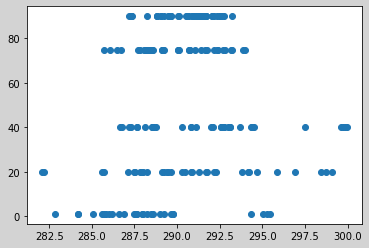

In [31]:
# Save the figure as a png file
fig, ax = plt.subplots()
ax.scatter(metro_one_week.temp, metro_one_week.clouds_all)
fig.set_facecolor('lightgray')
plt.savefig('Clouds_temp.png')